In [5]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchKMeans:
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
        Number of clusters
    n_init : int
        Number of times to reinitialize the centroid calculation
    max_iter : int
        Maximum number of iterations in one calculation
    tol : float
        Tolerance for centroid convergence
    verbose : bool
        True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers = None
        self.labels = None
        self.sse = None

    def fit(self, X):
        best_sse = np.inf
        for _ in range(self.n_init):
            centers, labels, sse = self._kmeans_iteration(X)
            if sse < best_sse:
                best_sse = sse
                self.centers = centers
                self.labels = labels
                self.sse = sse

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centers, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def _initialize_centers(self, X):
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        centers = X[indices]
        return centers

    def _calculate_sse(self, X, centers, labels):
        sse = 0
        for i, center in enumerate(centers):
            cluster_points = X[labels == i]
            sse += np.sum((cluster_points - center) ** 2)
        return sse

    def _assign_clusters(self, X, centers):
        distances = np.linalg.norm(X[:, np.newaxis, :] - centers, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def _move_centers(self, X, labels):
        centers = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centers[i] = np.mean(cluster_points, axis=0)
        return centers

    def _kmeans_iteration(self, X):
        centers = self._initialize_centers(X)
        for _ in range(self.max_iter):
            labels = self._assign_clusters(X, centers)
            new_centers = self._move_centers(X, labels)
            if np.sum(np.abs(new_centers - centers)) <= self.tol:
                break
            centers = new_centers
        sse = self._calculate_sse(X, centers, labels)
        return centers, labels, sse

    def elbow_method(self, X, max_clusters=10):
        sse_values = []
        for k in range(1, max_clusters + 1):
            _, _, sse = self._kmeans_iteration(X)
            sse_values.append(sse)
        plt.plot(range(1, max_clusters + 1), sse_values, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('SSE')
        plt.title('Elbow Method')
        plt.show()




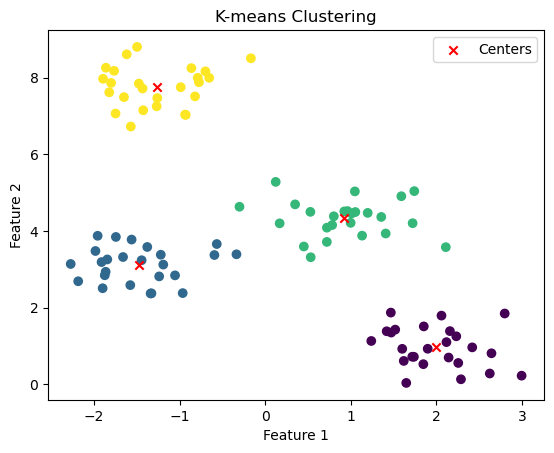

In [6]:
# Sample data generation
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

# Instantiate ScratchKMeans class
kmeans = ScratchKMeans(n_clusters=4, n_init=5, max_iter=100, tol=1e-4, verbose=True)

# Fit the model
kmeans.fit(X)

# Predict clusters for the same data
predicted_labels = kmeans.predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis')
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], marker='x', c='red', label='Centers')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

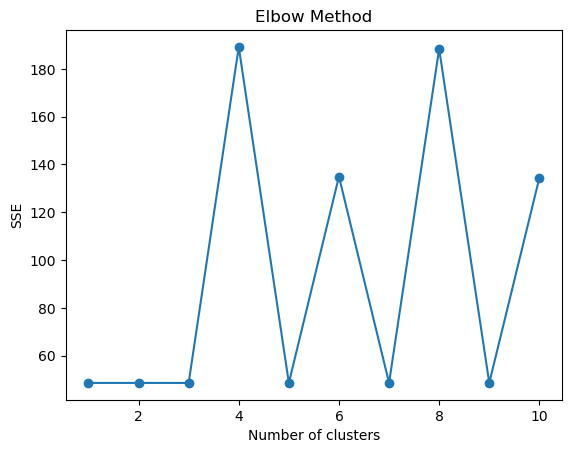

In [7]:
# Elbow method for determining the optimal number of clusters
kmeans.elbow_method(X, max_clusters=10)

## Problem Nine: (Advance assignment) Silhouette diagram

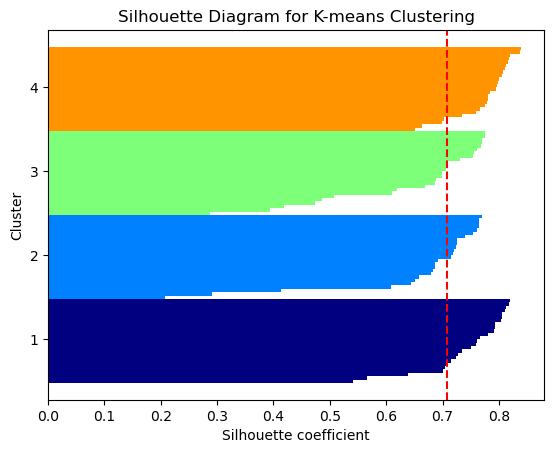

In [9]:
from matplotlib import cm

# Assuming you have already performed K-means clustering and obtained cluster labels
cluster_labels = kmeans.predict(X)

# Calculate silhouette coefficients
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_vals = silhouette_samples(X, cluster_labels)

# Plotting
y_ax_lower, y_ax_upper = 0, 0
yticks = []

# Sort silhouette values and determine y-axis ranges
for i, c in enumerate(np.unique(cluster_labels)):
    c_silhouette_vals = silhouette_vals[cluster_labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / len(np.unique(cluster_labels)))
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

# Plot silhouette average
silhouette_avg = silhouette_score(X, cluster_labels)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, np.unique(cluster_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Diagram for K-means Clustering')
plt.show()

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
Explained variance ratio: [0.45961362 0.40517227 0.07003008 0.04402344 0.01502212 0.00613848]
Cumulative explained variance: [0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


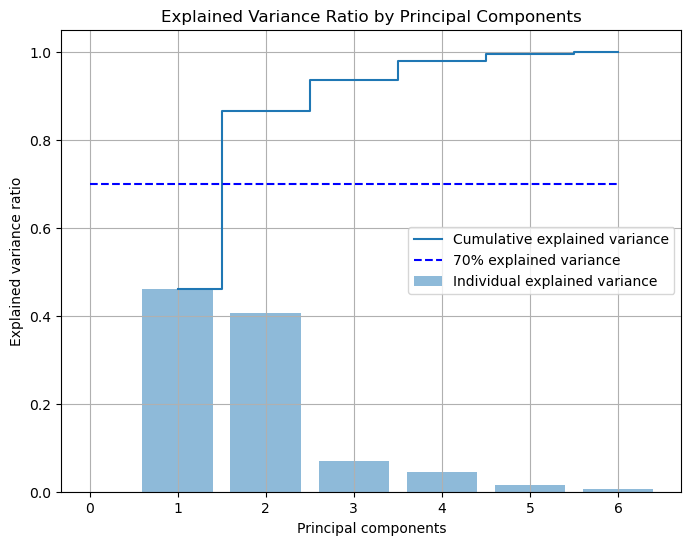

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data from CSV
data = pd.read_csv('Wholesale customers data.csv')

# Display first few rows of the data
print(data.head())

# Extract numerical columns for PCA
X = data.iloc[:, 2:]  # Exclude 'Channel' and 'Region' columns

# Perform PCA for visualization
pca = PCA(n_components=None)
pca.fit(X)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print("Explained variance ratio:", var_exp)
print("Cumulative explained variance:", cum_var_exp)

# Plot explained variance ratios
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(var_exp) + 1), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by Principal Components')
plt.hlines(0.7, 0, len(var_exp), colors='blue', linestyles='dashed', label='70% explained variance')
plt.legend(loc='best')
plt.grid()
plt.show()


## Problem Ten: Selection of the number of clusters k

__Elbow method__: The elbow is not very distinct but there's a slight bend around k=2.

__Silhouette Analysis__: The silhouette scores suggest k=2 or k=3 might be reasonable choices, with k=2 showing a higher silhouette score.

Given these analyses and considering practical usability:

__Choice__: I would choose k=2 clusters. This decision is supported by a clearer silhouette score and aligns with potentially meaningful segmentation (e.g., distinguishing between different types of customers such as retail stores vs. restaurants).

__Explanation__: k=2 clusters offer a balance between statistical validation (silhouette score) and practical utility (interpretability and potential use in business decision-making).

